In [1]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 3.0/3.0 MB 31.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 32.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139098 sha256=00b2e4bfcda81d5d0ba8bf6087981904a1d0699f81d5bb6127a3c6cb5fbf5e28
  Stored in directory: c:\users\bruno\appdata\local\pip\cache\wheels\91\08\75\7ec051c4c2b139cc4aa3a4ae6059d80900c301473b215aad59
Successfully built peewee



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
# Baixar dados do USD-BRL
dolar_yahoo = yf.download("USDBRL=X", start="2009-01-01")['Close']

# Converter para DataFrame
dolar_yahoo = dolar_yahoo.reset_index()
dolar_yahoo.columns = ['data', 'cotacao']

# Converter 'data' para datetime e extrair o ano
dolar_yahoo['data'] = pd.to_datetime(dolar_yahoo['data'])
dolar_yahoo['ano'] = dolar_yahoo['data'].dt.year

# Calcular média anual
media_anual = dolar_yahoo.groupby('ano')['cotacao'].mean().reset_index()

# Saída formatada
media_anual.columns = ['Ano', 'Cotação Média (USD-BRL)']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
media_anual.head()

,Ano,Cotação Média (USD-BRL)
0,2009,1.988851
1,2010,1.754732
2,2011,1.669180
3,2012,1.952577
4,2013,2.154575


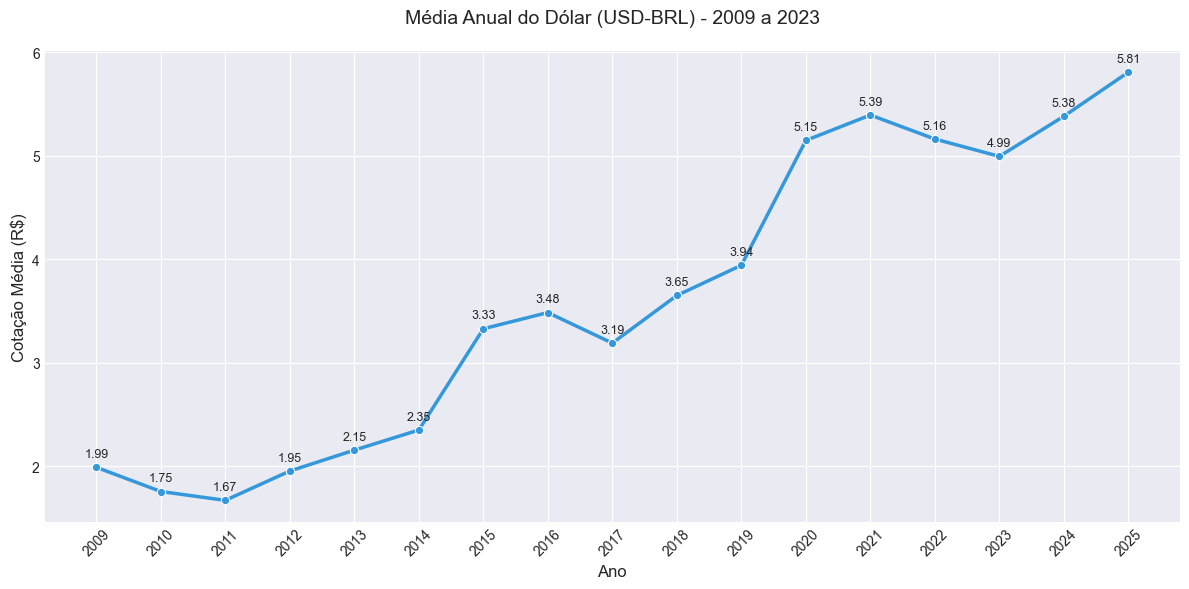

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'media_anual' seja seu DataFrame com as colunas 'Ano' e 'Cotação Média (USD-BRL)'
# Exemplo de dados (substitua pelos seus dados reais):

# Configurar o estilo do gráfico
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 6))

# Criar o gráfico de linha
sns.lineplot(
    data=media_anual,
    x='Ano',
    y='Cotação Média (USD-BRL)',
    marker='o',  # Marcadores para cada ponto
    linewidth=2.5,
    color='#3498db'
)

# Personalizações
plt.title('Média Anual do Dólar (USD-BRL) - 2009 a 2023', fontsize=14, pad=20)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Cotação Média (R$)', fontsize=12)
plt.xticks(media_anual['Ano'], rotation=45)  # Rotaciona os anos para melhor legibilidade

# Adicionar valores nos pontos
for i, row in media_anual.iterrows():
    plt.text(
        row['Ano'],
        row['Cotação Média (USD-BRL)'] + 0.1,
        f"{row['Cotação Média (USD-BRL)']:.2f}",
        ha='center',
        fontsize=9
    )

# Ajustar layout e mostrar
plt.tight_layout()
plt.show()
